## Anomaly Detecton in Credit Card Transactions

In [8]:
import time ,psutil, os ,gc
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpateches
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected =True)
from sklearn.model_selection import train_test_split
from tqdm.contrib import itertools

In [11]:
data = pd.read_csv("creditcard.csv")

In [14]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
#  Train , Test, Validation
data_0, data_1=data[data["Class"]==0], data[data["Class" ]==1]

x_0,y_0=data_0.drop("Class", axis=1), data_0["Class"]

x_1,y_1=data_1.drop("Class", axis=1), data_1["Class"]

x_train,x_test,y_train,y_test=train_test_split(x_0,y_0,test_size=0.2,random_state=40)

x_val,x_test,y_val,y_test=train_test_split(x_test,y_test, test_size=0.5, random_state=40)

data_val_1,data_test_1=pd.concat([x_val,y_val], axis=1), pd.concat([x_test,y_test], axis=1)

#frauduletn class

x_val,x_test,y_val,y_test=train_test_split(x_1,y_1, test_size=0.5,random_state=48)

data_val_2, data_test_2=pd.concat([x_val,y_val], axis=1),pd.concat([x_test,y_test], axis=1)

data_val, data_test=pd.concat([data_val_1,data_val_2],axis=0),pd.concat([data_test_1,data_test_2], axis=0)

x_val,y_val=data_val.drop("Class", axis=1), data_val["Class"]

x_test,y_test= data_test.drop("Class", axis=1), data_test["Class"]

                                                     

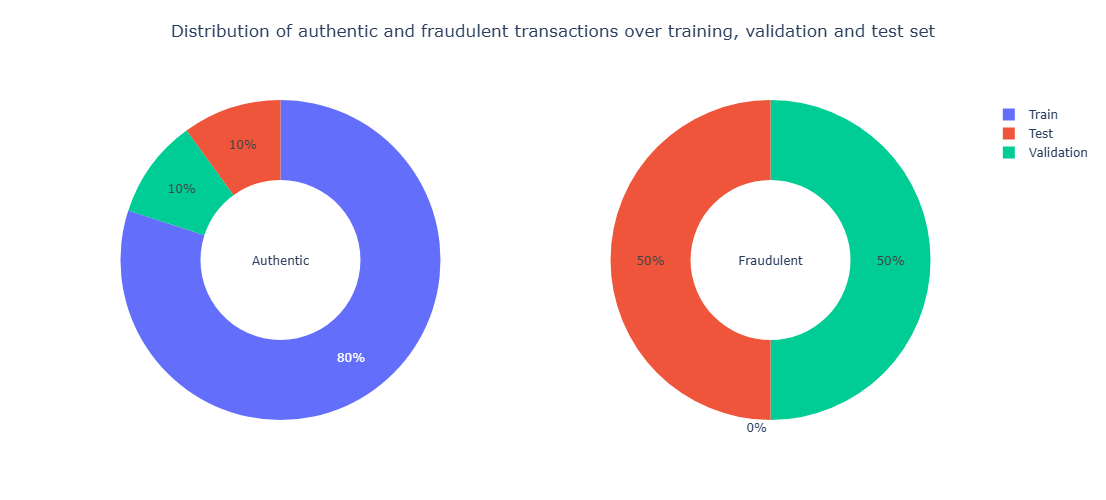

In [41]:
# Distribution of authentic and fraudulent transactions over training, validation and test set

labels = ['Train', 'Validation', 'Test']

values_0 =[len (y_train [y_train == 0]), len(y_val[y_val == 0]), len(y_test [y_test == 0])]

values_1 = [len(y_train[y_train == 1]), len(y_val[y_val == 1]), len(y_test[y_test == 1])]

fig = make_subplots(rows = 1, cols =2, specs = [[{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(go.Pie (values = values_0, labels= labels, hole =0.5, textinfo= 'percent', title = "Authentic"),
              row= 1, col = 1)

fig.add_trace(go.Pie (values = values_1, labels =labels, hole =0.5, textinfo= 'percent', title = "Fraudulent"),

row =1, col = 2)

text_title= "Distribution of authentic and fraudulent transactions over training, validation and test set"

fig.update_layout (height = 500, width = 800, showlegend= True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()




In general, throughout the notebook, we choose the number of bins of a histogram by the Freedman-Diaconis rule, which suggests the optimal number of bins to grow ask~n1/3, where n is the total number of observations.


In [45]:
#Setting the number of bins

bins_train =math.floor(len(x_train)**(1/3))

# Featur Engineering 

# Time

In [55]:
for df in [x_train, x_val, x_test]:

  df['Day'], temp=df['Time'] // (24*60*60), df ['Time'] % (24*60*60)

  df['Hour'], temp= temp // (60*60), temp% (60*60)

  df['Minute'], df ['Second'] =temp // 60, temp % 60

x_train [['Time', 'Day', 'Hour', 'Minute', 'Second']].head()

,Time,Day,Hour,Minute,Second
19594,30401.0,0.0,8.0,26.0,41.0
124712,77397.0,0.0,21.0,29.0,57.0
167920,118964.0,1.0,9.0,2.0,44.0
47377,43191.0,0.0,11.0,59.0,51.0
41731,40804.0,0.0,11.0,20.0,4.0


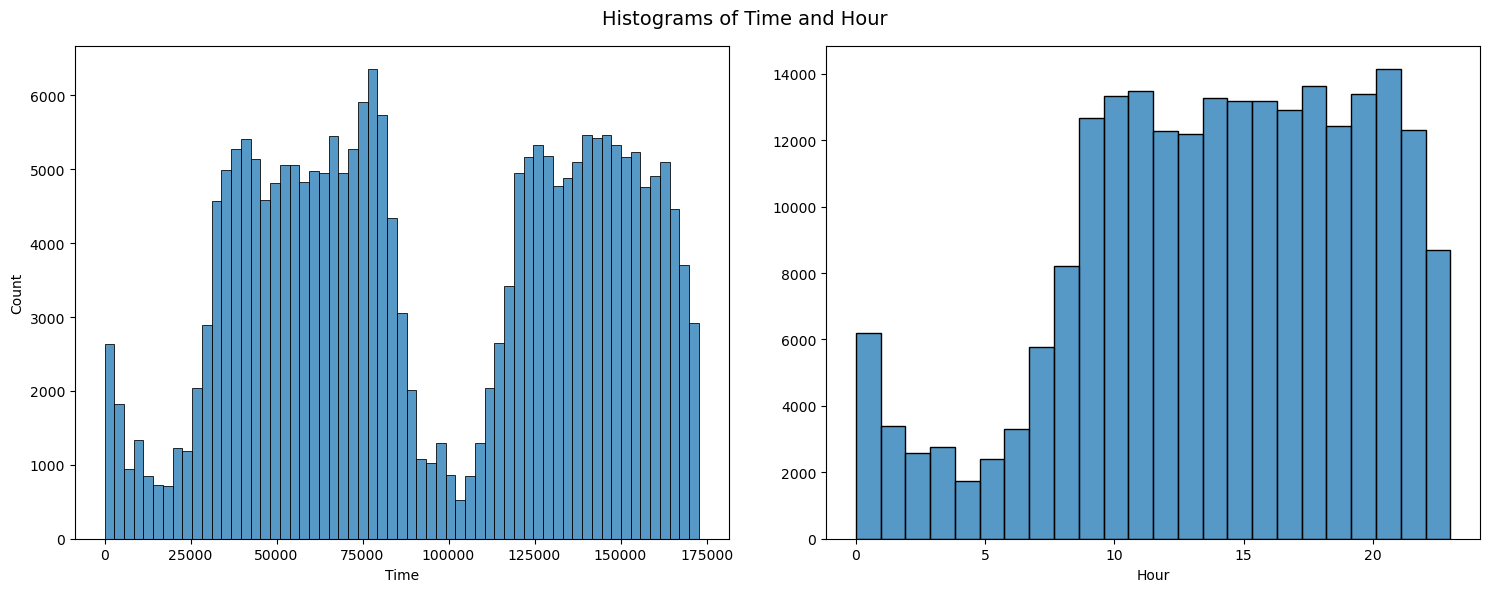

In [61]:

# Visualization

fig, ax= plt.subplots(1, 2, figsize= (15, 6), sharey = False)

sns.histplot(data= x_train, x ='Time', bins= bins_train, ax= ax[0])

sns.histplot(data = x_train, x = 'Hour', bins= 24, ax= ax[1])

ax[1].set_ylabel(" ")

plt.suptitle("Histograms of Time and Hour", size =14)

plt.tight_layout()

plt.show()

#  Amount

The distribution of Amount has extreme positive skewness. We apply the transformation z log (z+0.001) to this column and form the new column Amount transformed. The positive constant 0.001 is added to deal with the zero-amount transactions, which leads to log 0, an undefined quantity.

In [67]:
#Transformation of 'Amount"

for df in [x_train, x_val, x_test]:
   df['Amount_transformed']=np.log10(df['Amount'] + 0.001)

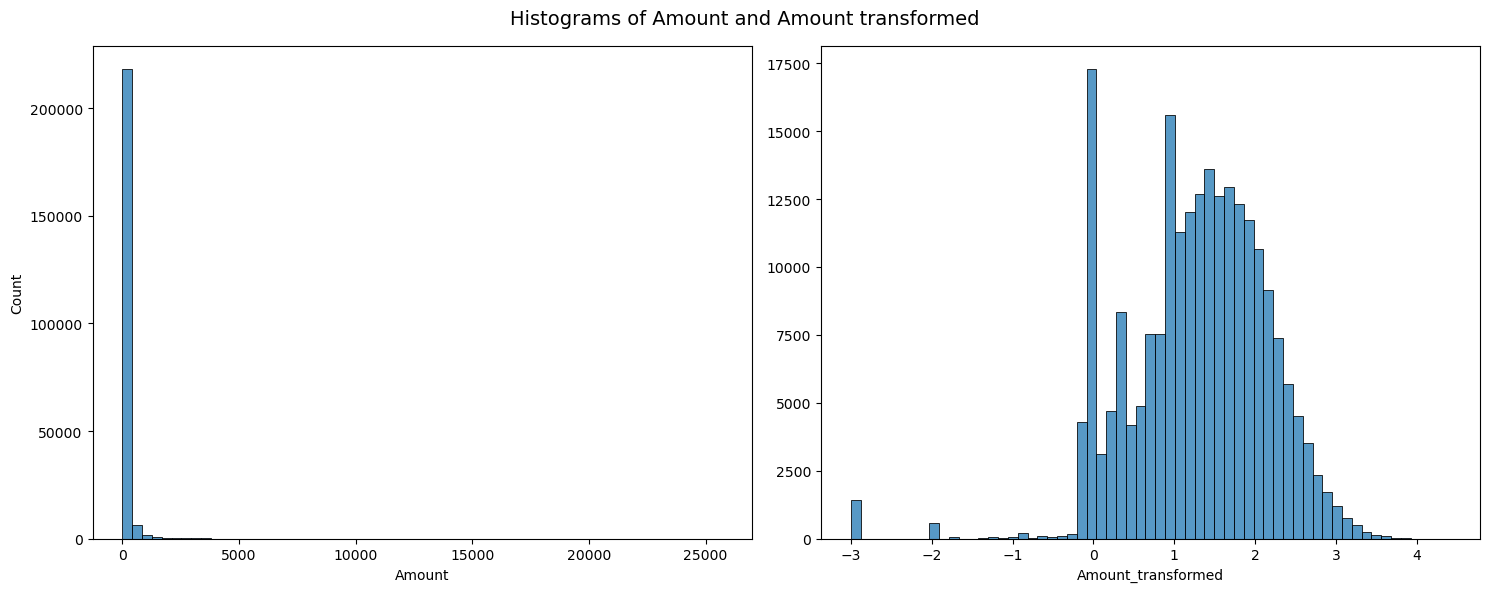

In [77]:
# Visualization

fig, ax= plt.subplots(1, 2, figsize =(15, 6), sharey =False)

sns.histplot(data= x_train, x ='Amount', bins= bins_train, ax= ax[0])

sns.histplot(data= x_train, x='Amount_transformed', bins= bins_train, ax= ax[1])

ax[1].set_ylabel("")

plt.suptitle("Histograms of Amount and Amount transformed", size= 14)

plt.tight_layout()

plt.show()



In [110]:
# List of columns to drop
columns_to_drop = ['Time', 'Day', 'Minute', 'Second', 'Amount']

# Drop columns safely from each DataFrame
for df in [x_train, x_val, x_test]:
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


# Feature Selection

From Thudumu et al. (2024):

High dimensionality creates difficulties for anomaly detection because, when the number of attributes or features increase, the amount of data needed to generalize accurately also grows, resulting in data sparsity in which data points are more scattered and isolated. This data sparsity is due to unnecessary unnecessaryows variables, or the high noise level of multiple irrelevant attributes, that conceal the true anomalies. This issue is widely acknowledged as the curse of to activate Windows dimensionality.

in the problem at hand, we have 30 features. We aim to keep only those which help substantially in discriminating between authentic and fraudulent transactions. More specifically, we compare the distribution of each feature for both the target classes. If a feature has similar distributions for both authentic and fraudulent transactions, then it is not likely to contribute much in the process of classifying a transaction as authentic or fraudulent. However, if a feature has very different distributions for different target classes, then it plays a far more significant role in the same process. We plot the distributions and select the features exhibiting fairly distinct distributions across the target classes.



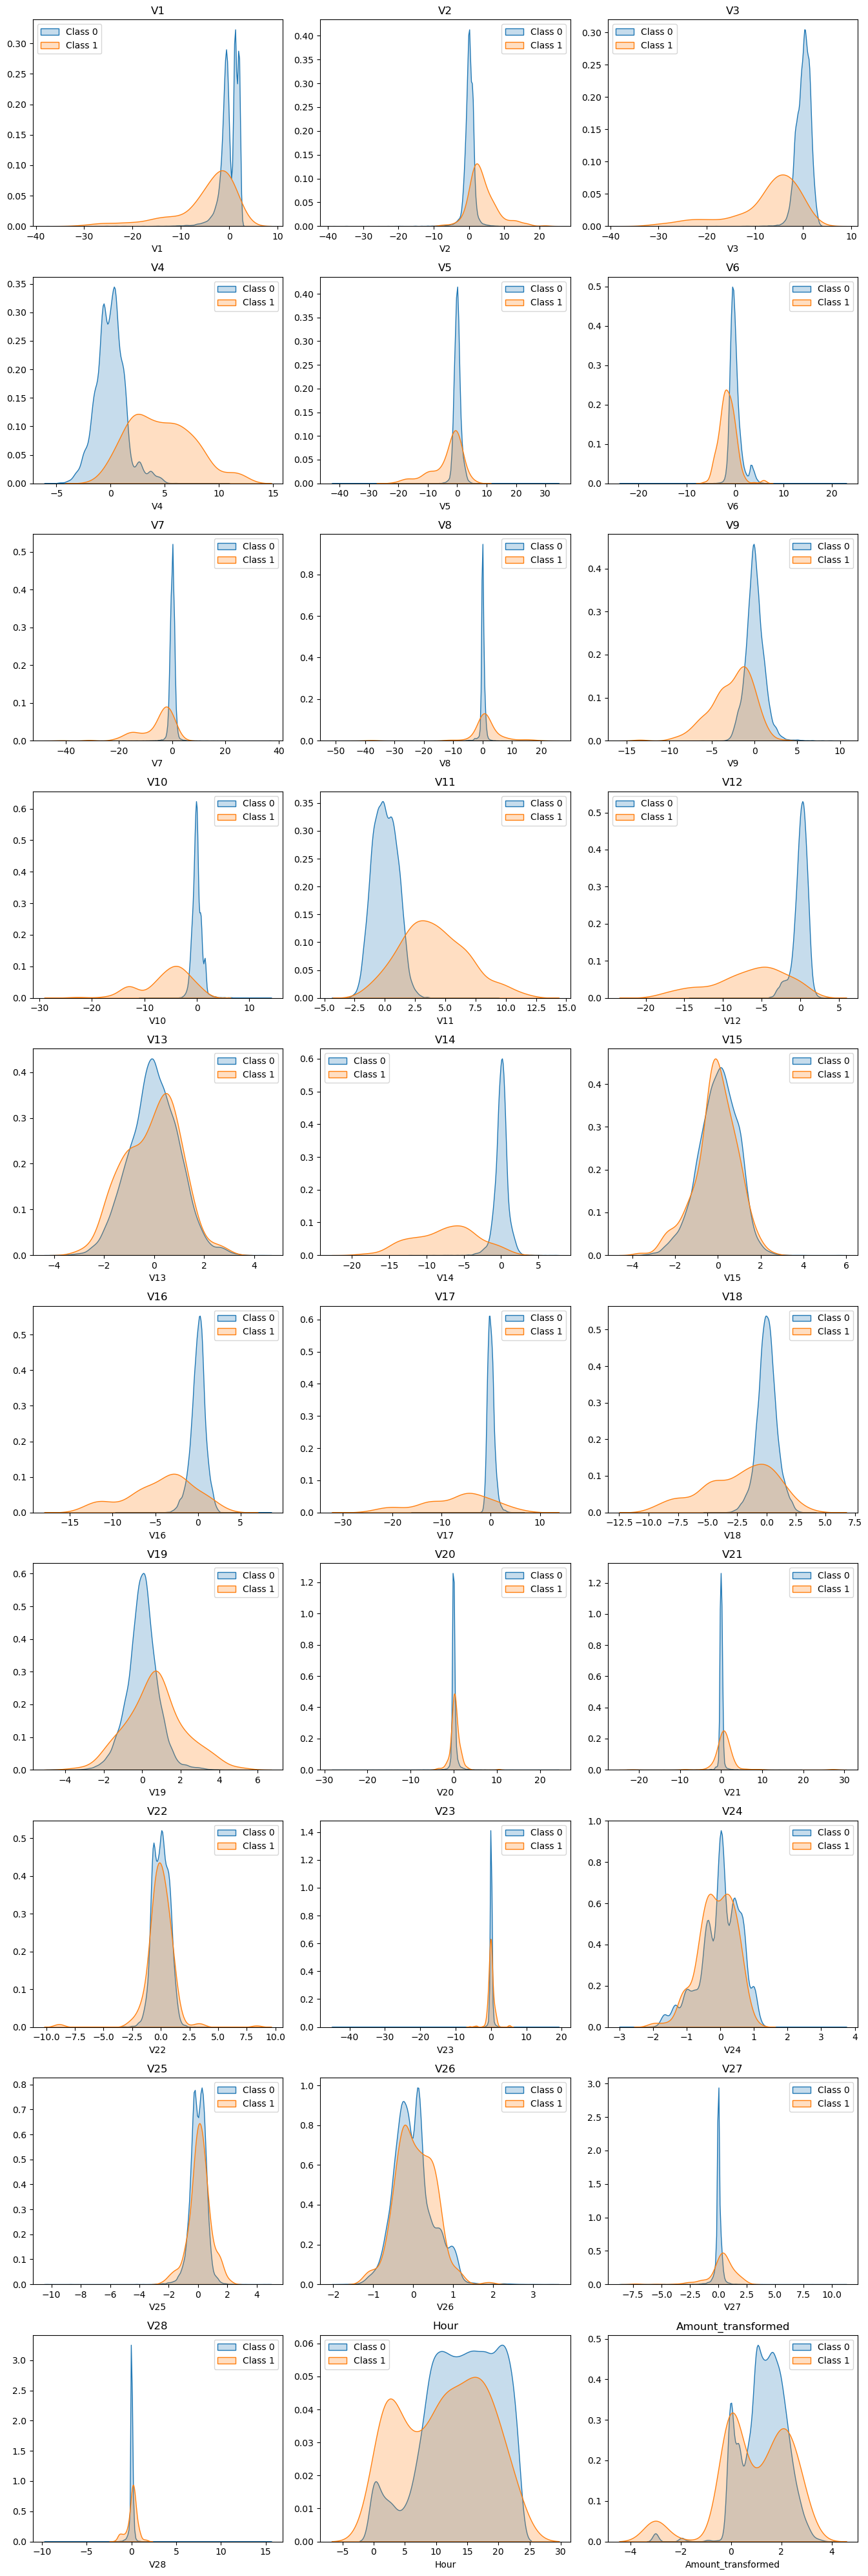

In [108]:
#Comparison of feature distributions for different target classes


# Combine x_val and y_val
data_val = pd.concat([x_val, y_val], axis=1)

# Separate the data by class
data_val_0 = data_val[data_val['Class'] == 0]
data_val_1 = data_val[data_val['Class'] == 1]

# Setup for subplots
cols = list(x_val.columns)
ncols = 3
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize=(4.5 * ncols, 4 * nrows))
ax = ax.flatten()  # Flatten for easy indexing

# Plot KDEs for each feature
for i in range(len(cols)):
    sns.kdeplot(data_val_0[cols[i]], ax=ax[i], label='Class 0', fill=True)
    sns.kdeplot(data_val_1[cols[i]], ax=ax[i], label='Class 1', fill=True)
    ax[i].set_title(cols[i])
    ax[i].legend()
    ax[i].set_ylabel("")

# Remove extra empty subplots if any
for j in range(len(cols), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


In [118]:
# Feature selection
cols = ['V4', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Hour']

# Select only the important features from each set
x_train_fs = x_train[cols]
x_val_fs = x_val[cols]
x_test_fs = x_test[cols]

# Show first few rows of the filtered training set
x_train_fs.head()


,V4,V11,V12,V14,V16,V17,V18,V19,Hour
19594,-0.706232,2.027925,0.535822,0.250769,0.773615,0.449717,-1.963208,0.613481,8.0
124712,1.474933,-1.154523,0.263527,0.316174,-1.029415,1.030772,-0.438839,0.529080,21.0
167920,4.840766,-2.242431,0.034829,-0.546349,-0.070375,1.033695,0.531801,1.215045,9.0
47377,0.565273,-0.157045,-0.548790,0.419194,0.183518,-0.681323,0.911357,1.318132,11.0
41731,-0.428860,-0.580964,-0.609099,-0.187948,1.226723,0.104368,-0.995711,0.420557,11.0


# Implementing Anomaly Detection

The probability density function (pdf) of a univariate normal distribution with mean u and standard deviation is given by


In [120]:
# Normal PDF
def normal_density(x, mu, sigma):
    """
    Computes the univariate normal probability density function (pdf)
    with mean `mu` and standard deviation `sigma`.

    Args:
        x (float): Input observation.
        mu (float): Mean of the distribution.
        sigma (float): Standard deviation (must be > 0).

    Returns:
        float: Value of the normal pdf at x.
    """
    assert sigma > 0, "Standard deviation must be positive"

    f = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return f


In [121]:
print(normal_density(0, 0, 1))  # Should return about 0.3989 (standard normal at x = 0)


0.3989422804014327


The next function computes the product of such univariate normal densities. This can be seen as the joint pdf of a number of feature variables, each of which has a univariate normal distribution and is statistically independent of the other features.



In [124]:
# Pricyct of normal pdfs

def normal_product(x_vec, mu_vec, sigma_vec):
    """
    Computes the product of univariate normal densities (assuming independence).

    Args:
        x_vec (array-like): Vector of input observations.
        mu_vec (array-like): Vector of means.
        sigma_vec (array-like): Vector of standard deviations (must be > 0).

    Returns:
        float: Product of the normal densities for all features.
    """
    x_vec = np.array(x_vec)
    mu_vec = np.array(mu_vec)
    sigma_vec = np.array(sigma_vec)

    assert len(x_vec) == len(mu_vec), "Length of mean vector does not match input vector"
    assert len(x_vec) == len(sigma_vec), "Length of std dev vector does not match input vector"
    assert np.all(sigma_vec > 0), "Standard deviations must be positive"

    f = 1.0
    for i in range(len(x_vec)):
        f *= normal_density(x_vec[i], mu_vec[i], sigma_vec[i])

    return f


In [127]:

print(normal_product(x, mu, sigma))  # Output: product of 3 normal densities


0.021347607646502353


In [130]:
# Model fitting

mu_train, sigma_train =x_train_fs.mean().values, x_train_fs.std().values



Then, we predict anomaly based on a given threshold e for probability density in the following way:

y=0 - (not anomaly), 

y=1- (anomaly), otherwise

In [141]:
def model_normal(X, epsilon, mu_train, sigma_train):
    """
    Anomaly detection model based on probability density threshold.

    Args:
        X (DataFrame): Feature data (shape: m samples × n features).
        epsilon (float): Threshold density value. Observations below this are anomalies.
        mu_train (list or array): Mean values for each feature.
        sigma_train (list or array): Standard deviations for each feature.

    Returns:
        list: Predicted class labels (1 = normal, 0 = anomaly).
    """
    y = []

    for i in X.index:
        x_row = X.loc[i].tolist()
        prob_density = normal_product(x_row, mu_train, sigma_train)
        label = int(prob_density >= epsilon)  # 1 = normal, 0 = anomaly
        y.append(label)

    return y


# Threshold Tuning on Validation Set

First, we construct some functions to compute and display the confusion matrix and to compute the F₂-score, given the true labels and the predicted labels of the target.

In [142]:
#Function to comimport numpy as np

def conf_mat(y_test, y_pred):
    """
    Computes confusion matrix for binary classification.

    Args:
        y_test (array-like): True binary labels (0 or 1).
        y_pred (array-like): Predicted binary labels (0 or 1).

    Returns:
        np.ndarray: A 2x2 confusion matrix:
                    [[TN, FP],
                     [FN, TP]]
    """
    # Convert inputs to lists
    y_test = list(y_test)
    y_pred = list(y_pred)

    # Initialize 2x2 matrix with zeros
    confusion_mat = np.zeros((2, 2), dtype=int)
    n = len(y_test)

    # Fill the confusion matrix
    for i in range(2):  # true class (0 or 1)
        for j in range(2):  # predicted class (0 or 1)
            confusion_mat[i][j] = sum(
                1 for k in range(n) if y_test[k] == i and y_pred[k] == j
            )

    return confusion_mat



In [144]:
y_true = [0, 0, 1, 1, 0, 1]
y_pred = [0, 1, 1, 0, 0, 1]

print(conf_mat(y_true, y_pred))



[[2 1]
 [1 2]]


In [146]:
#Function to print confusion matrix

def conf_mat_heatmap(y_test, y_pred):
    """
    Prints a heatmap representing a 2x2 confusion matrix.

    Args:
        y_test (array-like): True binary (0 or 1) labels.
        y_pred (array-like): Predicted binary (0 or 1) labels.

    Returns:
        None
    """
    # Compute confusion matrix
    confusion_mat_result = conf_mat(y_test, y_pred)

    # Create DataFrame for heatmap
    labels = [0, 1]
    confusion_mat_df = pd.DataFrame(confusion_mat_result, index=labels, columns=labels)

    # Plot heatmap
    plt.figure(figsize=(6, 4.75))
    sns.heatmap(confusion_mat_df, annot=True, fmt='d', cmap='Blues',
                annot_kws={"size": 16})

    plt.xticks([0.5, 1.5], labels, rotation='horizontal', fontsize=12)
    plt.yticks([0.5, 1.5], labels, rotation='horizontal', fontsize=12)

    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)
    plt.title("Confusion Matrix", fontsize=16)
    plt.grid(False)
    plt.tight_layout()
    plt.show()




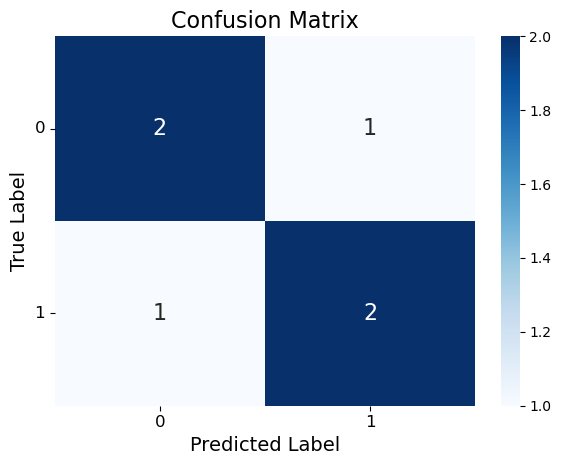

In [147]:
y_true = [0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 1, 1, 0, 0]

conf_mat_heatmap(y_true, y_pred)


In [151]:
# Function to compute and return F2-score

def f2_score(y_test, y_pred):
    """
    Computes the F2-score, which emphasizes recall more than precision.

    Args:
        y_test (array-like): True binary labels (0 or 1).
        y_pred (array-like): Predicted binary labels (0 or 1).

    Returns:
        float: F2-score.
    """
    # Get confusion matrix components
    confusion_mat_result = conf_mat(y_test, y_pred)
    tn = confusion_mat_result[0, 0]
    fp = confusion_mat_result[0, 1]
    fn = confusion_mat_result[1, 0]
    tp = confusion_mat_result[1, 1]

    # Avoid division by zero
    if (5 * tp + 4 * fn + fp) == 0:
        return 0.0

    # Compute F2-score
    f2 = (5 * tp) / (5 * tp + 4 * fn + fp)
    return f2



We set a sequence of threshold values alpha: 0.001, 0.002,, 0.05. These values are for the pdf of a single feature. The corresponding threshold for the joint probability density is alpha to the n-th power, where n is the number of features used in the model.

For each threshold, we compute the Fa-score to evaluate the model performance on.
                                                                                                                                                                                                            
 For each threshold, we compute the F₂-score to evaluate the model performance on the validation set. The validation F₂-score is plotted against the threshold alpha                                                                                                                                                                                                           

# Formula Used: F2-score = (1+2^2)⋅precision⋅recall/(2^2)⋅precision+recall =5⋅TP/5⋅TP+4⋅FN+FP



In [152]:
y_true = [0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 1, 1, 0, 0]

print(f2_score(y_true, y_pred))  # Output: F2-score as float


0.6666666666666666


In [ ]:
def model_normal(x, epsilon, mu_train, sigma_train):


In [160]:
# Tuning the threshold of density value
alpha_list = []
f2_list = []
f2_max = 0.0
alpha_opt = 0.0
y_val_pred_opt = np.zeros(len(y_val))

# Ensure mu and sigma are computed
mu_train = x_train_fs.mean().values
sigma_train = x_train_fs.std().values

for alpha in tqdm(np.arange(0.001, 0.051, 0.001)):
    
    epsilon = alpha ** x_val_fs.shape[1]  # Density threshold
    y_val_pred = model_normal(x_val_fs, epsilon, mu_train, sigma_train)  # Fixed function call
    
    f2 = f2_score(y_val, y_val_pred)  # Evaluate F2-score
    
    alpha_list.append(alpha)
    f2_list.append(f2)

    if f2 > f2_max:
        alpha_opt = alpha
        y_val_pred_opt = y_val_pred
        f2_max = f2

print(f"Optimal alpha: {alpha_opt}")
print(f"Maximum F2-score: {f2_max:.4f}")


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:16<00:00,  5.13s/it]

Optimal alpha: 0.001
Maximum F2-score: 0.0102


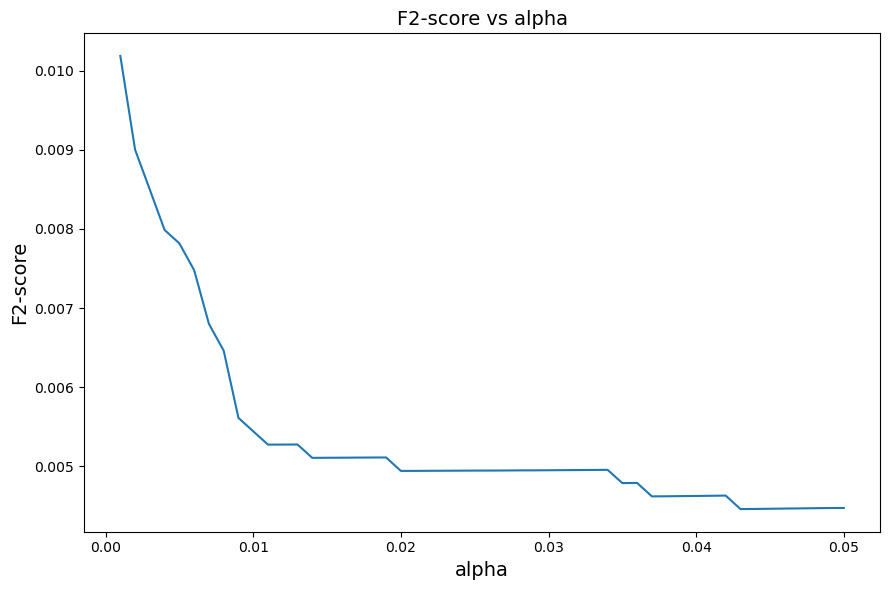

In [164]:
#Plotting F2-score over alpha

plt.figure(figsize= (9,6))

plt.plot(alpha_list, f2_list)

plt.xlabel("alpha", fontsize =14)

plt.ylabel("F2-score", fontsize =14)

plt.title("F2-score vs alpha", fontsize =14)

plt.tight_layout()

plt.show()


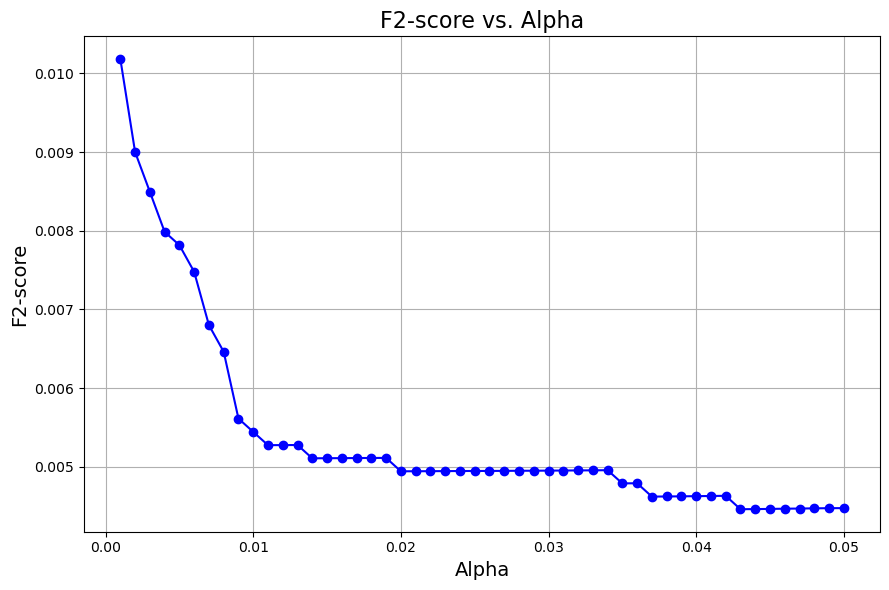

In [165]:
#Plotting F2-score over alpha

plt.figure(figsize=(9, 6))
plt.plot(alpha_list, f2_list, marker='o', linestyle='-', color='blue')

plt.xlabel("Alpha", fontsize=14)
plt.ylabel("F2-score", fontsize=14)
plt.title("F2-score vs. Alpha", fontsize=16)

plt.grid(True)
plt.tight_layout()
plt.show()


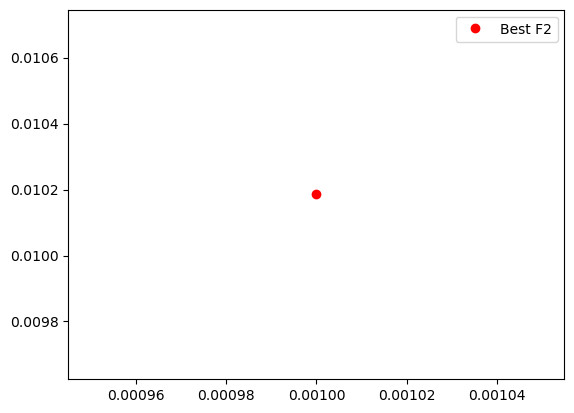

In [166]:
#Highlight optimal point:
best_idx = np.argmax(f2_list)
plt.plot(alpha_list[best_idx], f2_list[best_idx], 'ro', label='Best F2')
plt.legend()


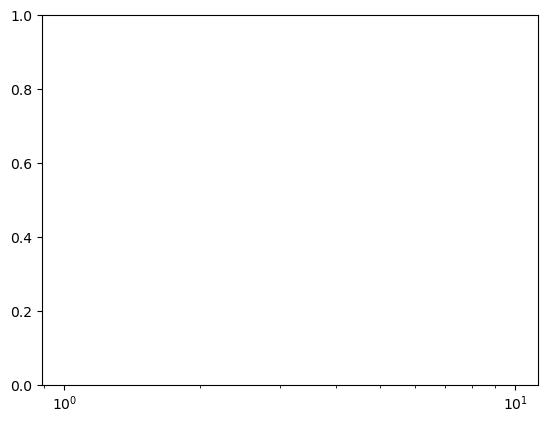

In [167]:
plt.xscale('log')


In [170]:
#Tuning summary
summary = pd.Series({
    "Optimal alpha": round(alpha_opt, 5),
    "Optimal F2-score": round(f2_score(y_val, y_val_pred_opt), 4)
})

print("\nTuning Summary:\n")
print(summary.to_string())



Tuning Summary:

Optimal alpha       0.0010
Optimal F2-score    0.0102


# Prediction and Evaluation on Test Set

In [206]:
# Function to compute and print evaluation metrics

def evaluation(y_test, y_pred):
    """
    Computes and prints evaluation metrics.

    Args:
        y_test (array-like): True binary labels
        y_pred (array-like): Predicted binary labels
    """
    confusion_mat = conf_mat(y_test, y_pred)

    tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]

    # Compute metrics
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = (2 * tp) / ((2 * tp) + fn + fp) if (2 * tp + fn + fp) != 0 else 0
    f2_score = (5 * tp) / ((5 * tp) + (4 * fn) + fp) if (5 * tp + 4 * fn + fp) != 0 else 0
    mcc_denom = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    mcc = ((tp * tn) - (fp * fn)) / mcc_denom if mcc_denom != 0 else 0

    # Print results
    print(pd.Series({
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1_score,
        "F2-score": f2_score,
        "MCC": mcc
    }).to_string())


In [211]:
#Prediction and evaluation on the test set

# Prediction and evaluation on the test set
y_test_normal = model_normal(
    x_test_fs,
    epsilon=alpha_opt**x_test_fs.shape[1],
    mu_train=mu_train,
    sigma_train=sigma_train
)

# Evaluate
evaluation(y_test, y_test_normal)



Accuracy       0.002894
Precision      0.002527
Recall         0.292683
F1-score       0.005011
F2-score       0.012213
MCC         -317.665619


C:\Users\sudis\AppData\Local\Temp\ipykernel_14192\2195941911.py:21: RuntimeWarning:

overflow encountered in scalar multiply



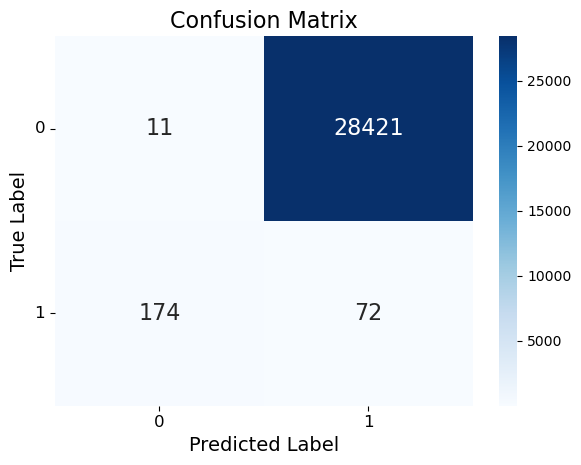

In [223]:
conf_mat_heatmap(y_test, y_test_normal)


# Conclusion

To sum up, we observed that the data is heavily imbalanced with fraudulent transaction occurring rarely compared to authentic transactions. Also there are possibilities for fraudulent transactions to occur in completely new ways than before, making it difficult to train data on fraudulent transactions. Thus we build an anomaly detection system to find transactions, which are, in some sense, different from the usual observations,

Specifically, we have extracted Hour out of The Time feature and log-transformed (with a slight shift) the highly skewed Amount, feature into Amount transformed. Out of the 30 features (obtained after feature engineering), we have selected 9 features which have significantly different distributions, for the different target classes: V4, V11, V12, V14, V16, V17, V18, V19 and Hour. Based on the training data, we fit a multivariate normal distribution (by estimating the vector of means and the vector of standard deviations, assuming statistical independence among the features, which is a reasonable condition as most of the features in the provided dataset are already PCA-engineered). Given a new transaction, if the corresponding density value of the fitted distribution is lower than a pre-specified threshold, then we flag the transaction as fraudulent. The choice of the threshold is optimized by iterating over a pre-specified set of values, predicting on the validation set, and evaluating the estimates by means of the Fa-score.

In this work, the optimal threshold value comes out to be 0.009^9 ~3.87 x 10 10. The corresponding F₂-score for predictions on the validation set is 0.834671, which is an optimistic projection due to the threshold tuning over the validation set. Applying the same model on the test set, we get predictions with an Fy-score of 0.816492.



# Acknowledgements

# References


Accuracy

Anomaly

Anomaly detection

Credit card fraud

Curse of dimensionality

Evaluation of binary classifiers

F-score

Freedman-Diaconis rule

Joint probability distribution

Labeled data

Lebesgue integration

Machine learning

Multivariate normal distribution

Normal distribution

Outlier

Phi coefficient

Precision and recall

Principal component analysis

# Principal component analysis


Probability density function

Probability distribution

Real-valued function

Semi-supervised learning

Statistics

Supervised learning

Unsupervised learning





In [ ]:
stop time.time()

print(pd.Series("Process runtime": "(2) seconds".format(float(stop start)),
"Process memory usage": "(1.2f) ".format(float(process.memory_info()[01/(1024*1024)))).to_string())

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3217531890.py, line 5)